In [12]:
import numpy as np
import time
import torch
import matplotlib.pyplot as plt
plt.rc('text', usetex=False)
import multiprocessing as mp
from typing import Union


from abc import ABC
from epde.preprocessing.cheb import process_point_cheb

from epde.preprocessing.deriv_calculators import Heatmap, AbstractDeriv, AdaptiveFiniteDeriv, PolynomialDeriv, SpectralDeriv, TotalVariation




In [20]:
#wave
L = 1.0          
T = 1.0          
Nx = 32          
Nt = 32          
c = 1.0          

dx = L / (Nx - 1)
dt = T / (Nt - 1)  
data = np.load('data_wave_noise0.01.npy')         
grid_x = np.linspace(0, L, Nx)
grid_t = np.linspace(0, T, Nt)
x = np.linspace(0, L, Nx)
t = np.linspace(0, T, Nt)

In [73]:
#pyqg
data = np.load('data_pyqg_noise0.npy')         
grid_x = np.load('x.npy')
grid_t = np.load('y.npy')
x = np.load('x.npy')
t = np.load('y.npy')

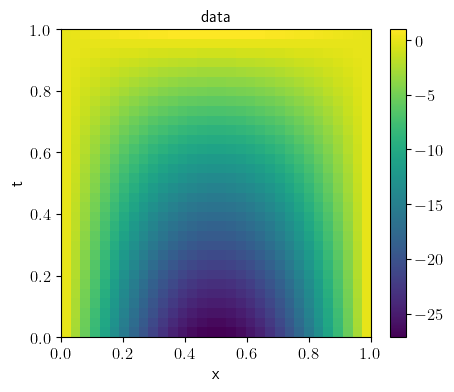

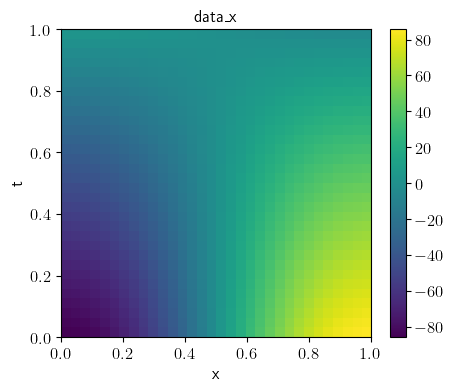

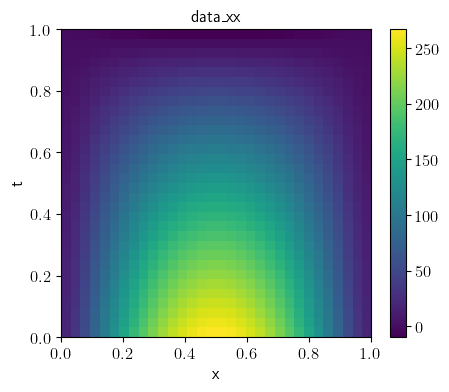

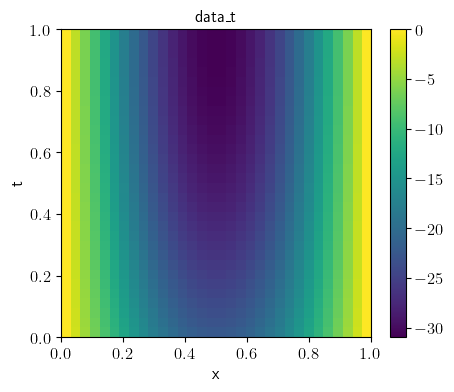

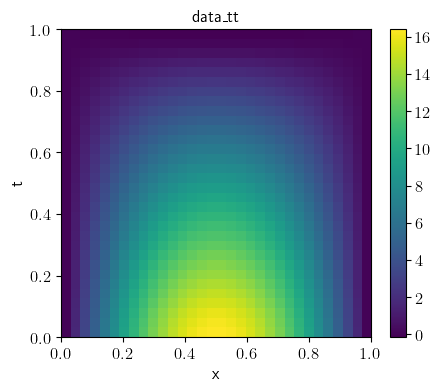

In [6]:
gradient_x = np.gradient(data, dx, axis=1, edge_order=2) 
gradient_t = np.gradient(data, dt, axis=0, edge_order=2)

gradient_xx = np.gradient(gradient_x, dx, axis = 1, edge_order=2)
gradient_tt = np.gradient(gradient_t, dt, axis = 0, edge_order=2)

plt.figure(figsize=(5, 4))
plt.imshow(data, aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('data')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(gradient_x, aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('data_x')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(gradient_xx, aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('data_xx')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(gradient_t, aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('data_t')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(gradient_tt, aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('data_tt')
plt.xlabel('x')
plt.ylabel('t')
plt.show()


In [28]:
np.save('wave_Gradient_x_noise0.01.npy', gradient_x)
np.save('wave_Gradient_xx_noise0.01.npy', gradient_xx)
np.save('wave_Gradient_t_noise0.01.npy', gradient_t)
np.save('wave_Gradient_tt_noise0.01.npy', gradient_tt)


(32, 32)
(32,)
(32,)


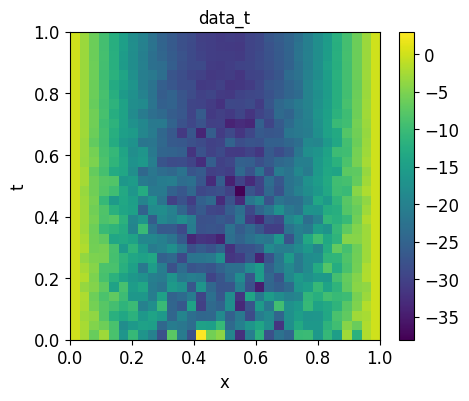

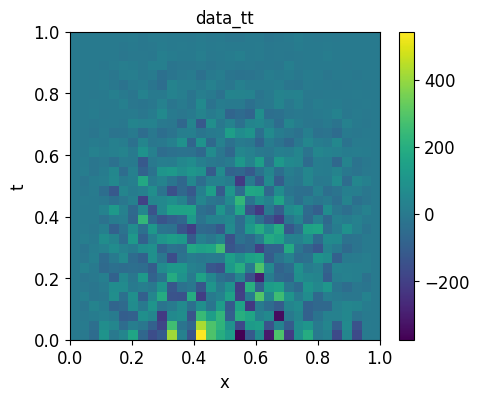

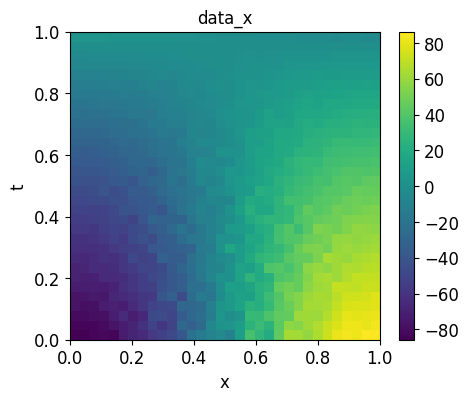

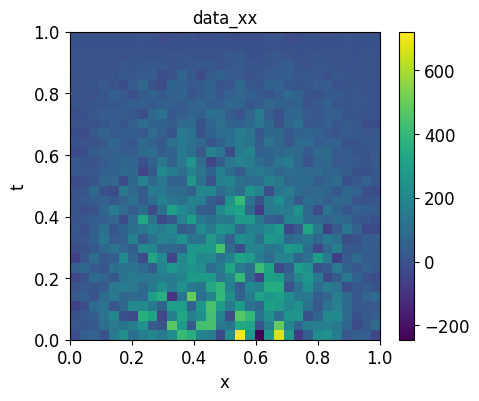

In [29]:
print(data.shape)
print(grid_x.shape)
print(grid_t.shape)
derivative_calculator = AdaptiveFiniteDeriv()

max_order = [2, 2]
mixed = False  

derivatives = derivative_calculator(data, [grid_x, grid_t], max_order, mixed).reshape(32, 32, 4)

derivatives1 = derivative_calculator(derivatives[:, :, 1], [grid_x, grid_t], max_order, mixed).reshape(32, 32, 4)

X, Y = np.meshgrid(grid_x, grid_t)

plt.figure(figsize=(5, 4))
plt.imshow(derivatives[:, :, 0], aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('data_t')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(derivatives[:, :, 1], aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('data_tt')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(derivatives[:, :, 2], aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('data_x')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(derivatives[:, :, 3], aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('data_xx')
plt.xlabel('x')
plt.ylabel('t')
plt.show()


In [30]:
np.save('wave_Adaptive_t_noise0.01.npy', derivatives[:, :, 0])
np.save('wave_Adaptive_tt_noise0.01.npy', derivatives[:, :, 1])
np.save('wave_Adaptive_x_noise0.01.npy', derivatives[:, :, 2])
np.save('wave_Adaptive_xx_noise0.01.npy', derivatives[:, :, 3])


In [18]:
print(data.shape)
print(grid_x.shape)
print(grid_t.shape)

(32, 32)
(32,)
(32,)


1024
1024


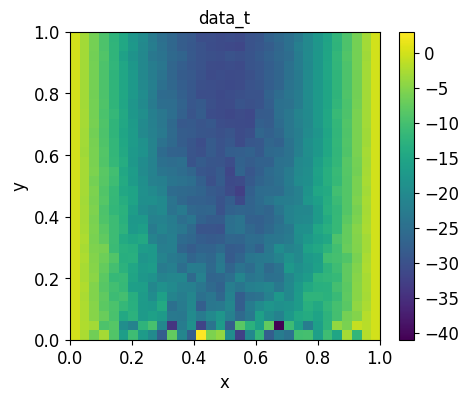

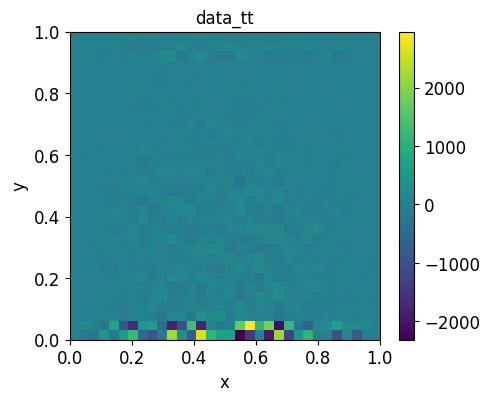

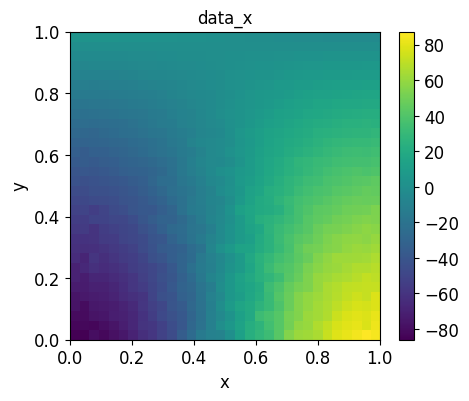

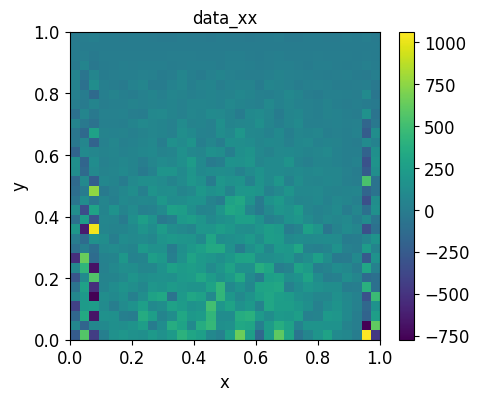

In [31]:
derivative_calculator = PolynomialDeriv()
max_order = 2
grids = np.meshgrid(grid_t, grid_x, indexing='ij')
derivatives = derivative_calculator(data, grids, max_order=max_order, mp_poolsize = 1, polynomial_window = 5, poly_order = 2).reshape(32, 32, 4)
derivatives1 = derivative_calculator(derivatives[:, :, 1], grids, max_order=max_order, mp_poolsize = 1, polynomial_window = 5, poly_order = 2).reshape(32, 32, 4)

X, Y = np.meshgrid(grid_x, grid_t)

plt.figure(figsize=(5, 4))
plt.imshow(derivatives[:, :, 0], aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('data_t')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(derivatives[:, :, 1], aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('data_tt')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(derivatives[:, :, 2], aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('data_x')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(derivatives[:, :, 3], aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('data_xx')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [32]:
np.save('wave_Polynomial_t_noise0.01.npy', derivatives[:, :, 0])
np.save('wave_Polynomial_tt_noise0.01.npy', derivatives[:, :, 1])
np.save('wave_Polynomial_x_noise0.01.npy', derivatives[:, :, 2])
np.save('wave_Polynomial_xx_noise0.01.npy', derivatives[:, :, 3])

(32, 32)
2
[array([0.        , 0.03225806, 0.06451613, 0.09677419, 0.12903226,
       0.16129032, 0.19354839, 0.22580645, 0.25806452, 0.29032258,
       0.32258065, 0.35483871, 0.38709677, 0.41935484, 0.4516129 ,
       0.48387097, 0.51612903, 0.5483871 , 0.58064516, 0.61290323,
       0.64516129, 0.67741935, 0.70967742, 0.74193548, 0.77419355,
       0.80645161, 0.83870968, 0.87096774, 0.90322581, 0.93548387,
       0.96774194, 1.        ]), array([0.        , 0.03225806, 0.06451613, 0.09677419, 0.12903226,
       0.16129032, 0.19354839, 0.22580645, 0.25806452, 0.29032258,
       0.32258065, 0.35483871, 0.38709677, 0.41935484, 0.4516129 ,
       0.48387097, 0.51612903, 0.5483871 , 0.58064516, 0.61290323,
       0.64516129, 0.67741935, 0.70967742, 0.74193548, 0.77419355,
       0.80645161, 0.83870968, 0.87096774, 0.90322581, 0.93548387,
       0.96774194, 1.        ])]


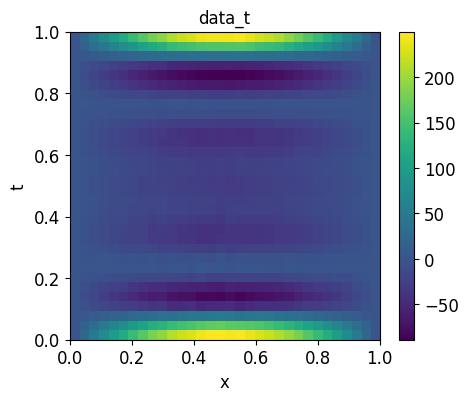

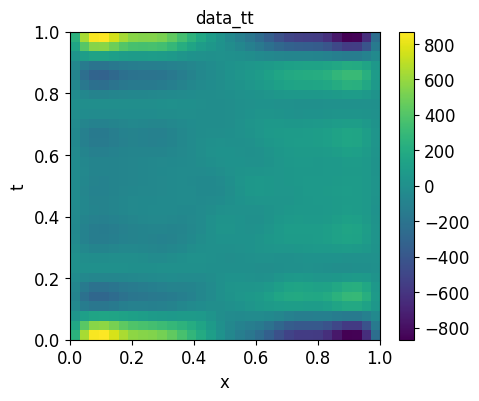

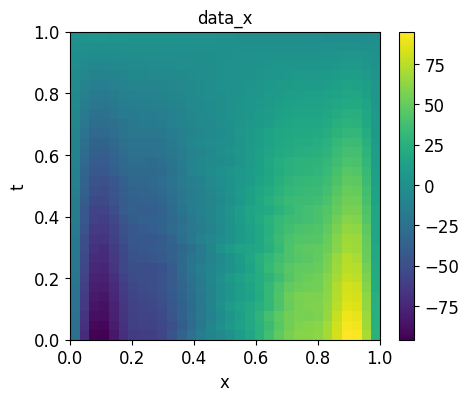

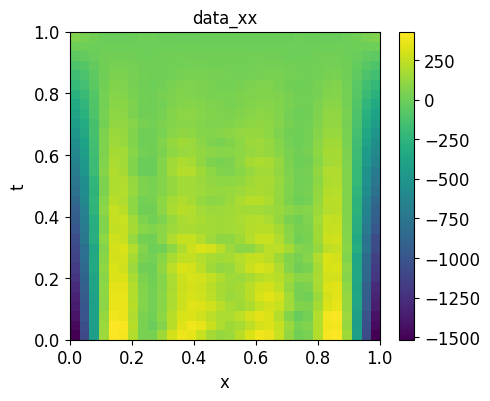

In [21]:
grid = [grid_t, grid_x]
print(data.shape)
print(len(grid))
print(grid)

derivative_calculator = SpectralDeriv()

derivatives = derivative_calculator.spectral_derivative_nd(data, grid, n=10, steepness=10)
derivatives1 = derivative_calculator.spectral_derivative_nd(derivatives[0][1], grid, n=10, steepness=10)
derivatives2 = derivative_calculator.spectral_derivative_nd(derivatives[1][1], grid, n=10, steepness=10)
derivatives3 = derivative_calculator.spectral_derivative_nd(derivatives1[0][1], grid, n=10, steepness=10)

Y, X = np.meshgrid(grid_t, grid_x, indexing = 'ij')

plt.figure(figsize=(5, 4))
plt.imshow(derivatives[0][1], aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('data_t')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(derivatives2[0][1], aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('data_tt')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(derivatives[1][1], aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('data_x')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(derivatives2[1][1], aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('data_xx')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

In [22]:
np.save('wave_Spectral_t_noise0.01.npy', derivatives[0][1])
np.save('wave_Spectral_tt_noise0.01.npy', derivatives2[0][1])
np.save('wave_Spectral_x_noise0.01.npy', derivatives[1][1])
np.save('wave_Spectral_xx_noise0.01.npy', derivatives2[1][1])

(32, 32)
2
[array([-4.        , -3.74193548, -3.48387097, -3.22580645, -2.96774194,
       -2.70967742, -2.4516129 , -2.19354839, -1.93548387, -1.67741935,
       -1.41935484, -1.16129032, -0.90322581, -0.64516129, -0.38709677,
       -0.12903226,  0.12903226,  0.38709677,  0.64516129,  0.90322581,
        1.16129032,  1.41935484,  1.67741935,  1.93548387,  2.19354839,
        2.4516129 ,  2.70967742,  2.96774194,  3.22580645,  3.48387097,
        3.74193548,  4.        ]), array([0.        , 0.03225806, 0.06451613, 0.09677419, 0.12903226,
       0.16129032, 0.19354839, 0.22580645, 0.25806452, 0.29032258,
       0.32258065, 0.35483871, 0.38709677, 0.41935484, 0.4516129 ,
       0.48387097, 0.51612903, 0.5483871 , 0.58064516, 0.61290323,
       0.64516129, 0.67741935, 0.70967742, 0.74193548, 0.77419355,
       0.80645161, 0.83870968, 0.87096774, 0.90322581, 0.93548387,
       0.96774194, 1.        ])]
(32, 32)
[[ 0.0159271   0.02033609  0.02586235 ... -0.06320429 -0.05126239
  -0.041129

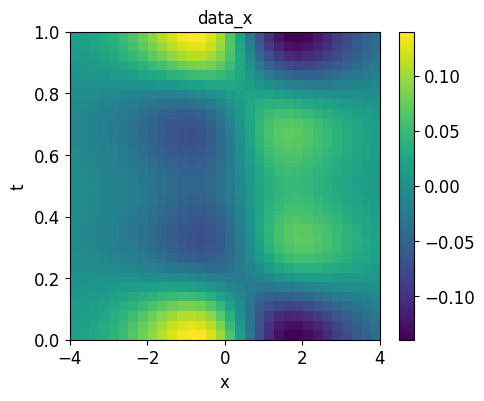

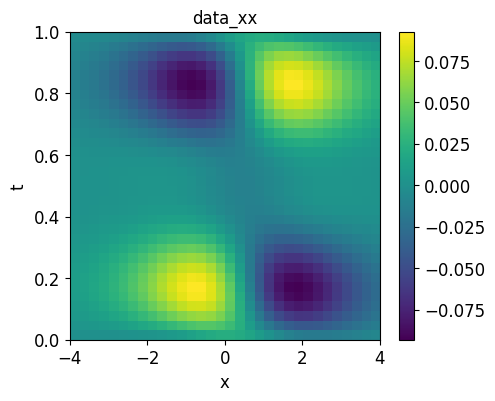

IndexError: list index out of range

<Figure size 500x400 with 0 Axes>

In [22]:
grid = [grid_x, grid_t]
print(data.shape)
print(len(grid))
print(grid)

derivative_calculator = SpectralDeriv()

derivatives = derivative_calculator.spectral_derivative_high_ord(data, grid, max_order=2, n=[5, 5], steepness=10)
X, Y = np.meshgrid(grid_x, grid_t)
print(derivatives[0][1])

plt.figure(figsize=(5, 4))
plt.imshow(derivatives[0][1], aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('data_x')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(derivatives[1][1], aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('data_xx')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(derivatives[2][1], aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('data_x')
plt.xlabel('x')
plt.ylabel('t')
plt.show()


For some reason has to be abysmal: (-8701.167438985083, 3140.6684661775953)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
For some reason has to be abysmal: (-258.8590189611358, 134.00108413696805)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55


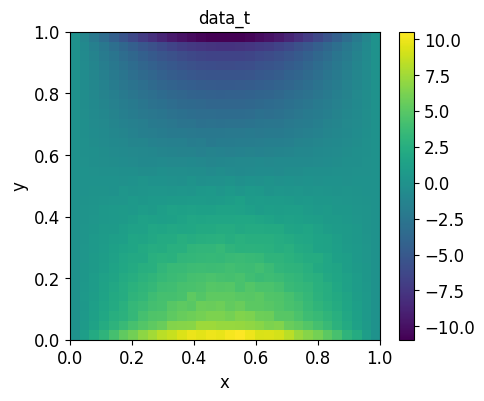

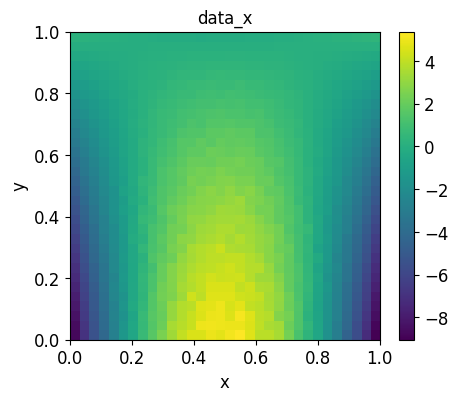

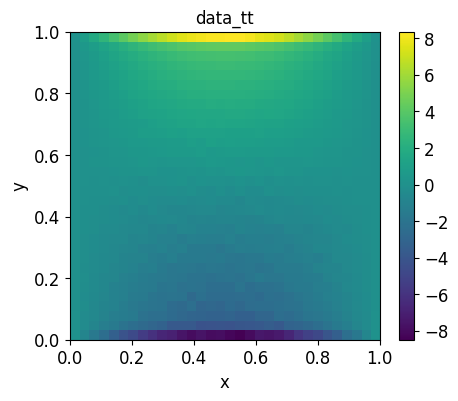

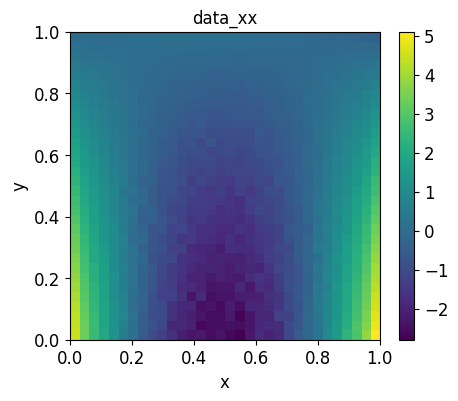

In [35]:
lbd = 1000
reg_strng = 100
c_const = 1

derivative_calculator = TotalVariation()

derivatives1 = derivative_calculator.optimize_with_admm(data, lbd, reg_strng, c_const)
derivatives2 = derivative_calculator.optimize_with_admm(derivatives1[0, :, :], lbd, reg_strng, c_const)
derivatives3 = derivative_calculator.optimize_with_admm(derivatives1[1, :, :], lbd, reg_strng, c_const)
#derivatives4 = derivative_calculator.optimize_with_admm(derivatives2[0, :, :], lbd, reg_strng, c_const)#третья производная

Y, X = np.meshgrid(grid_t, grid_x, indexing = 'ij')

plt.figure(figsize=(5, 4))
plt.imshow(derivatives1[0, :, :], aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('data_t')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(derivatives1[1, :, :], aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('data_x')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(derivatives2[0, :, :], aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('data_tt')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(derivatives3[1, :, :], aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('data_xx')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [36]:
np.save('wave_Total_x_noise0.01.npy', derivatives1[1, :, :])
np.save('wave_Total_xx_noise0.01.npy', derivatives3[1, :, :])
np.save('wave_Total_t_noise0.01.npy', derivatives1[0, :, :])
np.save('wave_Total_tt_noise0.01.npy', derivatives2[0, :, :])


Mean Squared Error (MSE) for noise level 0:
  u_xx: 2.0602378687940757
  u_tt: 1.2876040566267144
Mean Squared Error (MSE) for noise level 0.005:
  u_xx: 56.24208472827105
  u_tt: 947.3597277057603
Mean Squared Error (MSE) for noise level 0.01:
  u_xx: 213.6322073986372
  u_tt: 4567.213845842643


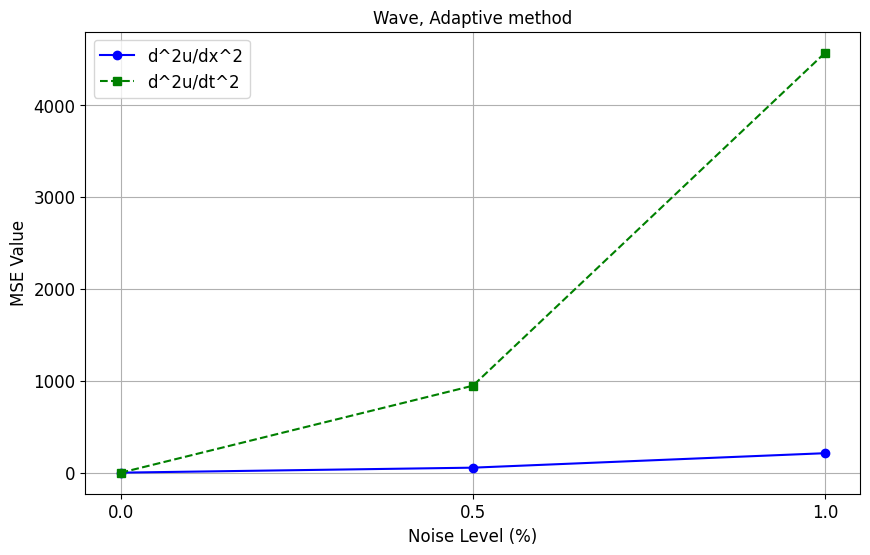

In [7]:
#ошибка дифференцирования между аналитической производной и численной для каждого слагаемого
import matplotlib as mpl
mpl.rc('text', usetex=False)
def calculate_mse(matrix1, matrix2):
    return np.mean((matrix1 - matrix2) ** 2)

noise_levels = [0, 0.005, 0.01]
noise_levels_percent = [0, 0.5, 1]

mse_values_u_xx = []
mse_values_u_tt = []

for noise in noise_levels:
    u_xx = np.load(f'Wave_Gradient_xx_noise{noise}.npy')
    u_tt = np.load(f'Wave_Gradient_tt_noise{noise}.npy')
    
    gradient_xx = np.load(f'Wave_Adaptive_xx_noise{noise}.npy')
    gradient_tt = np.load(f'Wave_Adaptive_tt_noise{noise}.npy')
    
    # Вычисление MSE для каждого случая
    mse_u_xx = calculate_mse(u_xx, gradient_xx)
    mse_u_tt = calculate_mse(u_tt, gradient_tt)
    
    mse_values_u_xx.append(mse_u_xx)
    mse_values_u_tt.append(mse_u_tt)
    
    print(f'Mean Squared Error (MSE) for noise level {noise}:')
    print(f'  u_xx: {mse_u_xx}')
    print(f'  u_tt: {mse_u_tt}')

plt.figure(figsize=(10, 6))
plt.plot(noise_levels_percent, mse_values_u_xx, marker='o', linestyle='-', color='b', label='d^2u/dx^2')
plt.plot(noise_levels_percent, mse_values_u_tt, marker='s', linestyle='--', color='g', label='d^2u/dt^2')

plt.title('Wave, Adaptive method')
plt.xlabel('Noise Level (%)')
plt.ylabel('MSE Value')
plt.xticks(noise_levels_percent)
plt.legend()
plt.grid()
plt.savefig('Wave_Adaptive_error.pdf', format='pdf')
plt.show()


Mean Squared Error (MSE) for noise level 0:
  u_xx: 9.841733254923046
  u_tt: 0.005654084697593394
Mean Squared Error (MSE) for noise level 0.005:
  u_xx: 3047.6636713303296
  u_tt: 13167.176036392933
Mean Squared Error (MSE) for noise level 0.01:
  u_xx: 10740.080858248259
  u_tt: 57619.245213851544


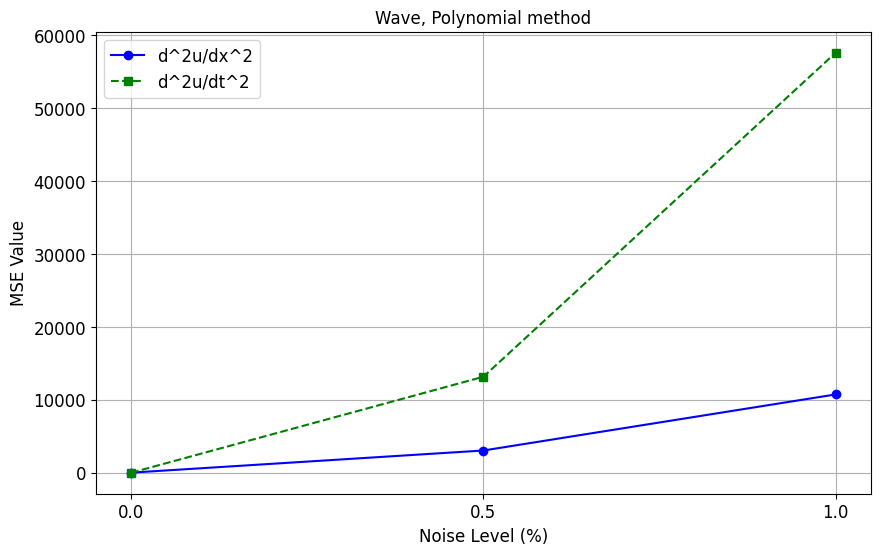

In [8]:
#ошибка дифференцирования между аналитической производной и численной для каждого слагаемого
import matplotlib as mpl
mpl.rc('text', usetex=False)
def calculate_mse(matrix1, matrix2):
    return np.mean((matrix1 - matrix2) ** 2)

noise_levels = [0, 0.005, 0.01]
noise_levels_percent = [0, 0.5, 1]

mse_values_u_xx = []
mse_values_u_tt = []

for noise in noise_levels:
    u_xx = np.load(f'Wave_Gradient_xx_noise{noise}.npy')
    u_tt = np.load(f'Wave_Gradient_tt_noise{noise}.npy')
    
    gradient_xx = np.load(f'Wave_Polynomial_xx_noise{noise}.npy')
    gradient_tt = np.load(f'Wave_Polynomial_tt_noise{noise}.npy')
    
    # Вычисление MSE для каждого случая
    mse_u_xx = calculate_mse(u_xx, gradient_xx)
    mse_u_tt = calculate_mse(u_tt, gradient_tt)
    
    mse_values_u_xx.append(mse_u_xx)
    mse_values_u_tt.append(mse_u_tt)
    
    print(f'Mean Squared Error (MSE) for noise level {noise}:')
    print(f'  u_xx: {mse_u_xx}')
    print(f'  u_tt: {mse_u_tt}')

plt.figure(figsize=(10, 6))
plt.plot(noise_levels_percent, mse_values_u_xx, marker='o', linestyle='-', color='b', label='d^2u/dx^2')
plt.plot(noise_levels_percent, mse_values_u_tt, marker='s', linestyle='--', color='g', label='d^2u/dt^2')

plt.title('Wave, Polynomial method')
plt.xlabel('Noise Level (%)')
plt.ylabel('MSE Value')
plt.xticks(noise_levels_percent)
plt.legend()
plt.grid()
plt.savefig('Wave_Polynomial_error.pdf', format='pdf')
plt.show()


Mean Squared Error (MSE) for noise level 0:
  u_xx: 87251.45162563784
  u_tt: 32328.79916289215
Mean Squared Error (MSE) for noise level 0.005:
  u_xx: 87963.7106716303
  u_tt: 36937.90708573171
Mean Squared Error (MSE) for noise level 0.01:
  u_xx: 92107.82315930033
  u_tt: 44231.863069503495


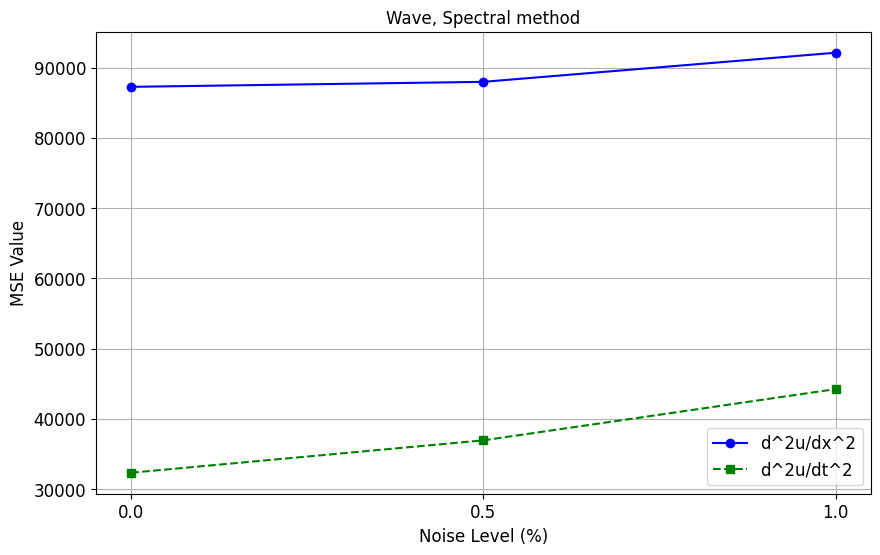

: 

In [ ]:
#ошибка дифференцирования между аналитической производной и численной для каждого слагаемого
import matplotlib as mpl
mpl.rc('text', usetex=False)
def calculate_mse(matrix1, matrix2):
    return np.mean((matrix1 - matrix2) ** 2)

noise_levels = [0, 0.005, 0.01]
noise_levels_percent = [0, 0.5, 1]

mse_values_u_xx = []
mse_values_u_tt = []

for noise in noise_levels:
    u_xx = np.load(f'Wave_Gradient_xx_noise{noise}.npy')
    u_tt = np.load(f'Wave_Gradient_tt_noise{noise}.npy')
    
    gradient_xx = np.load(f'Wave_Spectral_xx_noise{noise}.npy')
    gradient_tt = np.load(f'Wave_Spectral_tt_noise{noise}.npy')
    
    # Вычисление MSE для каждого случая
    mse_u_xx = calculate_mse(u_xx, gradient_xx)
    mse_u_tt = calculate_mse(u_tt, gradient_tt)
    
    mse_values_u_xx.append(mse_u_xx)
    mse_values_u_tt.append(mse_u_tt)
    
    print(f'Mean Squared Error (MSE) for noise level {noise}:')
    print(f'  u_xx: {mse_u_xx}')
    print(f'  u_tt: {mse_u_tt}')

plt.figure(figsize=(10, 6))
plt.plot(noise_levels_percent, mse_values_u_xx, marker='o', linestyle='-', color='b', label='d^2u/dx^2')
plt.plot(noise_levels_percent, mse_values_u_tt, marker='s', linestyle='--', color='g', label='d^2u/dt^2')

plt.title('Wave, Spectral method')
plt.xlabel('Noise Level (%)')
plt.ylabel('MSE Value')
plt.xticks(noise_levels_percent)
plt.legend()
plt.grid()
plt.savefig('Wave_Spectral_error.pdf', format='pdf')
plt.show()


Mean Squared Error (MSE) for noise level 0:
  u_xx: 12282.161221934804
  u_tt: 47.90867428021828
Mean Squared Error (MSE) for noise level 0.005:
  u_xx: 13359.641308218619
  u_tt: 3287.356116285863
Mean Squared Error (MSE) for noise level 0.01:
  u_xx: 17561.92363296873
  u_tt: 15300.698657160618


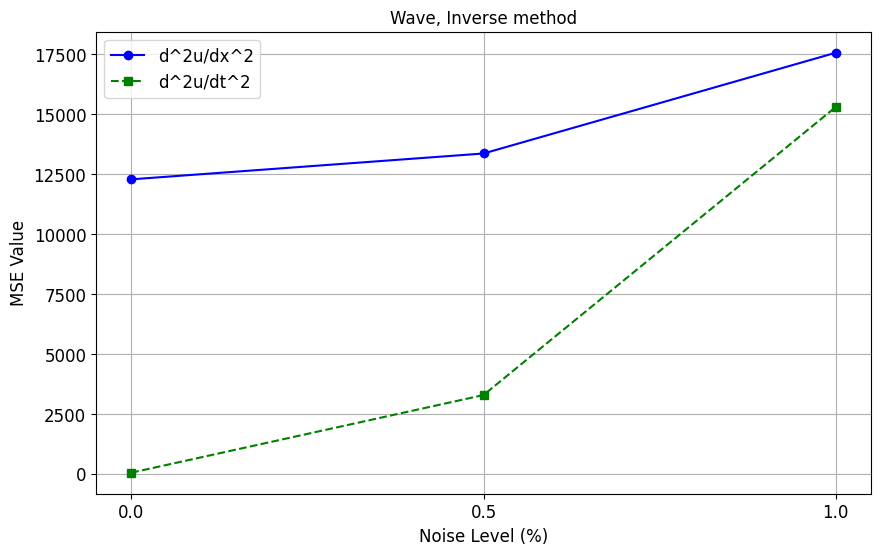

In [10]:
#ошибка дифференцирования между аналитической производной и численной для каждого слагаемого
import matplotlib as mpl
mpl.rc('text', usetex=False)
def calculate_mse(matrix1, matrix2):
    return np.mean((matrix1 - matrix2) ** 2)

noise_levels = [0, 0.005, 0.01]
noise_levels_percent = [0, 0.5, 1]

mse_values_u_xx = []
mse_values_u_tt = []

for noise in noise_levels:
    u_xx = np.load(f'Wave_Gradient_xx_noise{noise}.npy')
    u_tt = np.load(f'Wave_Gradient_tt_noise{noise}.npy')
    
    gradient_xx = np.load(f'Wave_Inverse_xx_noise{noise}.npy')
    gradient_tt = np.load(f'Wave_Inverse_tt_noise{noise}.npy')
    
    # Вычисление MSE для каждого случая
    mse_u_xx = calculate_mse(u_xx, gradient_xx)
    mse_u_tt = calculate_mse(u_tt, gradient_tt)
    
    mse_values_u_xx.append(mse_u_xx)
    mse_values_u_tt.append(mse_u_tt)
    
    print(f'Mean Squared Error (MSE) for noise level {noise}:')
    print(f'  u_xx: {mse_u_xx}')
    print(f'  u_tt: {mse_u_tt}')

plt.figure(figsize=(10, 6))
plt.plot(noise_levels_percent, mse_values_u_xx, marker='o', linestyle='-', color='b', label='d^2u/dx^2')
plt.plot(noise_levels_percent, mse_values_u_tt, marker='s', linestyle='--', color='g', label='d^2u/dt^2')

plt.title('Wave, Inverse method')
plt.xlabel('Noise Level (%)')
plt.ylabel('MSE Value')
plt.xticks(noise_levels_percent)
plt.legend()
plt.grid()
plt.savefig('Wave_Inverse_error.pdf', format='pdf')
plt.show()


Mean Squared Error (MSE) for noise level 0:
  u_xx: 12444.138283776607
  u_tt: 65.60593054489911
Mean Squared Error (MSE) for noise level 0.005:
  u_xx: 13524.80492019103
  u_tt: 3315.1318070426355
Mean Squared Error (MSE) for noise level 0.01:
  u_xx: 17738.127053374043
  u_tt: 15580.155802653368


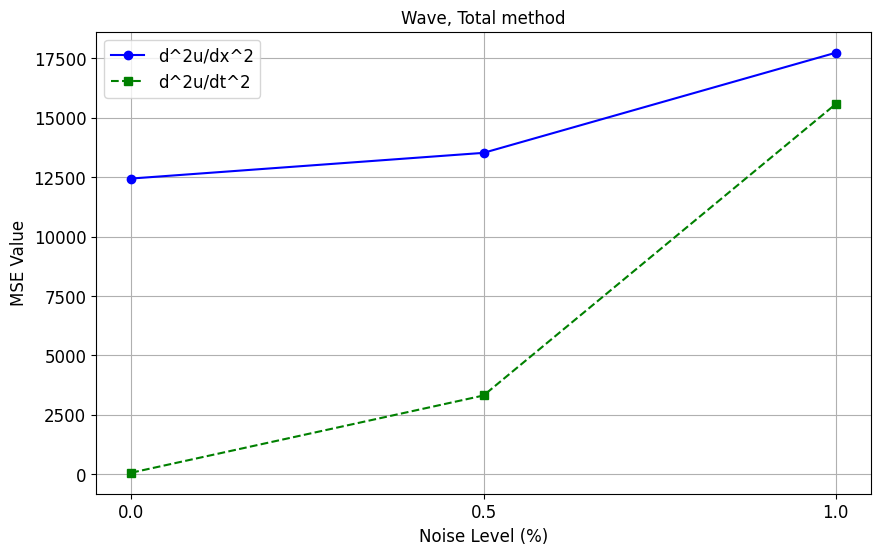

In [11]:
#ошибка дифференцирования между аналитической производной и численной для каждого слагаемого
import matplotlib as mpl
mpl.rc('text', usetex=False)
def calculate_mse(matrix1, matrix2):
    return np.mean((matrix1 - matrix2) ** 2)

noise_levels = [0, 0.005, 0.01]
noise_levels_percent = [0, 0.5, 1]

mse_values_u_xx = []
mse_values_u_tt = []

for noise in noise_levels:
    u_xx = np.load(f'Wave_Gradient_xx_noise{noise}.npy')
    u_tt = np.load(f'Wave_Gradient_tt_noise{noise}.npy')
    
    gradient_xx = np.load(f'Wave_Total_xx_noise{noise}.npy')
    gradient_tt = np.load(f'Wave_Total_tt_noise{noise}.npy')
    
    # Вычисление MSE для каждого случая
    mse_u_xx = calculate_mse(u_xx, gradient_xx)
    mse_u_tt = calculate_mse(u_tt, gradient_tt)
    
    mse_values_u_xx.append(mse_u_xx)
    mse_values_u_tt.append(mse_u_tt)
    
    print(f'Mean Squared Error (MSE) for noise level {noise}:')
    print(f'  u_xx: {mse_u_xx}')
    print(f'  u_tt: {mse_u_tt}')

plt.figure(figsize=(10, 6))
plt.plot(noise_levels_percent, mse_values_u_xx, marker='o', linestyle='-', color='b', label='d^2u/dx^2')
plt.plot(noise_levels_percent, mse_values_u_tt, marker='s', linestyle='--', color='g', label='d^2u/dt^2')

plt.title('Wave, Total method')
plt.xlabel('Noise Level (%)')
plt.ylabel('MSE Value')
plt.xticks(noise_levels_percent)
plt.legend()
plt.grid()
plt.savefig('Wave_Total_error.pdf', format='pdf')
plt.show()
